In [1]:
import seaborn as sns
tips = sns.load_dataset("tips")
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [2]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [3]:
#stats summary
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


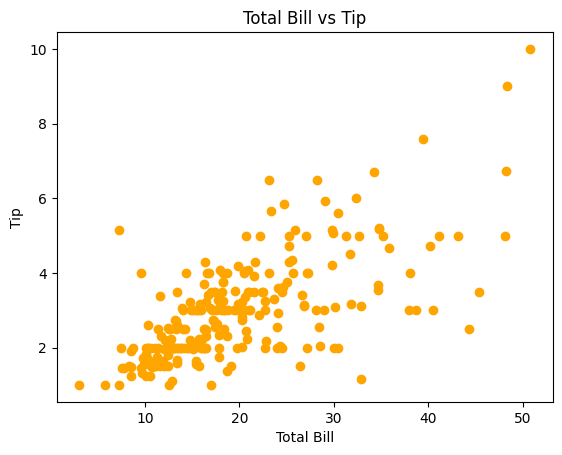

In [4]:
#relationship check
import matplotlib.pyplot as plt
plt.scatter(tips['total_bill'], tips['tip'],color='orange')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Total Bill vs Tip')
plt.show()

observations of the abov eplot are:

1. as the bill increases tip increses
2. Relationshhip =  straight line(we use linear regression)

In [5]:
#feature & target separation 
x=tips[['total_bill']]
y=tips['tip']
#train-test split
#a model must perform well on unseen data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#80% training, 20% testing

In [6]:
#feature standardization
#why?
#1.compare coeefficients fairly
#2.avoid the dominance of large values
#3.prepare for ridge, lasso regression
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)
'''Imp:
1.PRevet data leakage
2.Fit on train, transform on test
'''

'Imp:\n1.PRevet data leakage\n2.Fit on train, transform on test\n'

In [7]:
#Train Linear Regression Model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train_scaled, y_train)
print("Co-efficient (m):", model.coef_[0])
print("Intercept (c):", model.intercept_)
y_pred=model.predict(x_test_scaled)

Co-efficient (m): 0.9357171400271826
Intercept (c): 3.0877948717948724


In [8]:
#model Evaluation
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.5449381659234664


In [9]:
from sklearn.metrics import mean_squared_error
import numpy as np
mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
rmse=np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 0.5688142529229538
Root Mean Squared Error: 0.7541977545199626


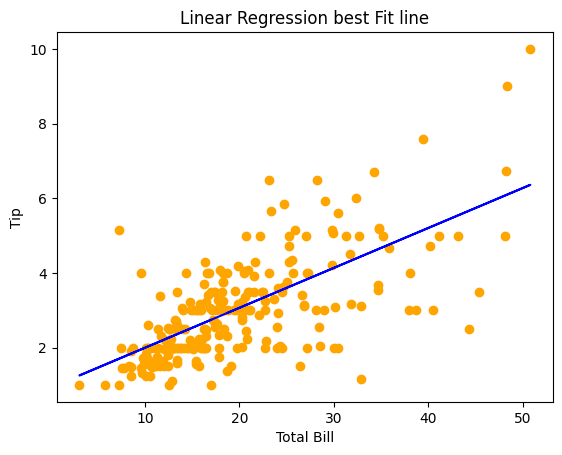

In [10]:
#Visulaze the best fit line
plt.scatter(x,y, color='orange', label='Data Points')
plt.plot(x,model.predict(scaler.transform(x)), color='blue', label='Best Fit Line')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Linear Regression best Fit line')
plt.show()

In [13]:
#input-output real time
bill_amount=float(input("Enter the total bill amount: "))
bill_amount_scaled=scaler.transform([[bill_amount]])
tip_amount=model.predict(bill_amount_scaled)
print(f"Predicted Tip Amount: ${tip_amount[0]:.2f}")

Predicted Tip Amount: $13.76


C:\Users\vedap\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
